<a href="https://colab.research.google.com/github/CSCCNY/final-project-recomposeclassics/blob/main/02_Spectogram_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recompose Classics : **Import Data & Run CNN Model**
Hannah Do

May 10th, 2021



---


##### **Summary**

1. Running **spectogram arrays** in KNN model


2. Running **spectogram arrays** in Basic CNN model


3. Running **spectogram arrays** in different complex CNN models

---

**Import saved array** - combined specto arrays from notebook 2b

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

import librosa
import librosa.display

import IPython.display as ipd

import numpy as np
import random

from scipy.io.wavfile import write

In [54]:
x_train = np.load("/Users/SAMSUNG/Downloads/dnn_data/x_train.npy")

x_train.shape

(1275, 128, 646)

In [55]:
y_train = np.load("/Users/SAMSUNG/Downloads/dnn_data/y_train.npy")

y_train.shape

(1275, 128, 646)

In [56]:
x_test = np.load("/Users/SAMSUNG/Downloads/dnn_data/x_test.npy")

x_test.shape

(158, 128, 646)

In [57]:
y_test = np.load("/Users/SAMSUNG/Downloads/dnn_data/y_test.npy")

y_test.shape

(158, 128, 646)

In [15]:
# testing audio playback

sr = 44100

audio_path = '/Users/SAMSUNG/Downloads/yaoo2.wav'
wav = librosa.db_to_power(y_test[1], ref=1.0)
wav = librosa.feature.inverse.mel_to_audio (M=wav, hop_length=518, sr=sr)
write (audio_path, sr, wav.astype(np.float32))

In [ ]:
! pip install keras

In [ ]:
! pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=fb8454f2f1b4e9e2bba87a5028a3cf61aa129faa2879f53484a61f3cfd7a722b
  Stored in directory: c:\users\samsung\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=9edc9594e927391f0dc1390878bb8069ac94fbf9dc2a6e9648b4500dea7f369b
  Stored in directory: c:\users\samsung\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2


In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers import Conv2D, Conv2DTranspose, MaxPool2D, LeakyReLU
from keras.utils import np_utils

from keras import backend as K

In [ ]:

x_train = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/x_train.npy")
y_train = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/y_train.npy")
x_test = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/x_test.npy")
y_test = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/y_test.npy")


## **Implement Baseline model with Linear Regression**

Train data : 1275 images with input shape (128, 646)

Test data : 158 images with input shape (128, 646)

- Basic Linear Regression model

In [58]:
x_train_1d = x_train.reshape(-1,1)
x_test_1d = x_test.reshape(-1,1)

y_train_1d = y_train.reshape(-1,1)
y_test_1d = y_test.reshape(-1,1)

In [60]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

clf.fit(x_train_1d, y_train_1d)
y_pred = clf.predict(x_test_1d)


In [62]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("MAE:",mean_absolute_error(y_test_1d, y_pred))
print("MSE:",mean_squared_error(y_test_1d, y_pred))


MAE: 9.343149
MSE: 167.1632


## **First model**
Train data : 1275 images with input shape (128, 646, 1)

Test data : 158 images with input shape (128, 646, 1)

- Basic CNN model with minimum parameters


In [17]:

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import numpy as np


In [25]:
x_train_expanded = np.expand_dims(x_train, -1)
y_train_expanded = np.expand_dims(y_train, -1)
x_test_expanded = np.expand_dims(x_test, -1)
y_test_expanded = np.expand_dims(y_test, -1)


In [27]:
x_train_expanded.shape, y_train_expanded.shape, x_test_expanded.shape, y_test_expanded.shape

((1275, 128, 646, 1),
 (1275, 128, 646, 1),
 (158, 128, 646, 1),
 (158, 128, 646, 1))

In [20]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [29]:

model = Sequential()

model.add(Conv2D(1, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(128, 646, 1)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2DTranspose(1, (4,4), strides=(2,2), padding='same'))
model.add(LeakyReLU(alpha=0.2))

# output layer
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 646, 1)       10        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 323, 1)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 323, 1)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 128, 646, 1)       17        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 646, 1)       0         
_________________________________________________________________
dense_1 (Dense)              (None, 128, 646, 1)       2         
Total params: 29
Trainable params: 29
Non-trainable params: 0
__________________________________________________________

In [32]:
# compiling the sequential model
model.compile(loss='mse', metrics=['mae'], optimizer='adam')

# training the model for 10 epochs
history = model.fit(y_train_expanded, y_train_expanded, epochs=10, validation_data=(x_test_expanded, y_test_expanded))


Epoch 1/10
40/40 [==============================] - 11s 272ms/step - loss: 1891.4437 - mae: 37.2413 - val_loss: 1325.6895 - val_mae: 29.6167
Epoch 2/10
40/40 [==============================] - 11s 272ms/step - loss: 1343.1047 - mae: 29.2490 - val_loss: 782.9340 - val_mae: 21.8485
Epoch 3/10
40/40 [==============================] - 11s 278ms/step - loss: 872.1330 - mae: 22.6594 - val_loss: 402.6711 - val_mae: 15.1970
Epoch 4/10
40/40 [==============================] - 11s 278ms/step - loss: 610.2521 - mae: 18.4817 - val_loss: 262.7296 - val_mae: 12.3343
Epoch 5/10
40/40 [==============================] - 11s 278ms/step - loss: 494.7248 - mae: 16.3199 - val_loss: 223.5286 - val_mae: 11.4103
Epoch 6/10
40/40 [==============================] - 11s 282ms/step - loss: 434.5436 - mae: 15.0866 - val_loss: 209.8755 - val_mae: 11.0297
Epoch 7/10
40/40 [==============================] - 12s 299ms/step - loss: 404.1499 - mae: 14.6664 - val_loss: 204.0379 - val_mae: 10.8490
Epoch 8/10
40/40 [======

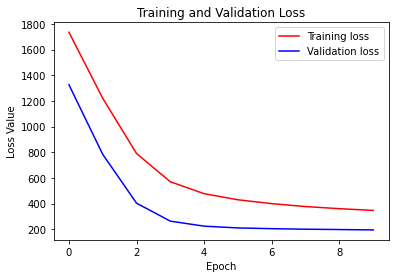

In [33]:
import matplotlib.pyplot as plt

epochs = 10
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(epochs)

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')

plt.legend()
plt.show()

- Here we can see the **steady decrease in loss value** for both train and validation data - can run for more epochs with higher learning rate

## **Second model**
Train data : 1275 images with input shape (128, 646, 1)

Test data : 158 images with input shape (128, 646, 1)

- Slightly developed CNN model with more Convolution layers, LeakyRelu and additional nodes.
- **Deep and narrow** layers with few nodes in each layer


In [68]:

model2 = Sequential()

model2.add(Conv2D(1, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(128, 646, 1)))

# convolutional layer
model2.add(Conv2D(5, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

model2.add(Conv2DTranspose(2, (4,4), strides=(2,2), padding='same'))
model2.add(LeakyReLU(alpha=0.2))

model2.add(Conv2D(5, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(1,1)))

model2.add(Conv2D(5, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2DTranspose(2, (4,4), strides=(2,2), padding='same'))
model2.add(LeakyReLU(alpha=0.2))

model2.add(Conv2D(5, (4,4), strides=(2,2), padding='same'))
model2.add(LeakyReLU(alpha=0.2))

model2.add(Dropout(0.25))

model2.add(Dense(1, activation='linear'))

model2.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 128, 646, 1)       10        
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 128, 646, 5)       50        
_________________________________________________________________
conv2d_transpose_41 (Conv2DT (None, 256, 1292, 2)      162       
_________________________________________________________________
leaky_re_lu_45 (LeakyReLU)   (None, 256, 1292, 2)      0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 256, 1292, 5)      15        
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 256, 1292, 5)      0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 256, 1292, 5)    

In [69]:
# compiling the sequential model
model2.compile(loss='mse', metrics=['mae'], optimizer='adam')

# training the model
history2 = model2.fit(y_train_expanded, y_train_expanded, epochs=10, validation_data=(x_test_expanded, y_test_expanded))


Epoch 1/10
40/40 [==============================] - 141s 4s/step - loss: 2654.6512 - mae: 46.5722 - val_loss: 537.6698 - val_mae: 19.2399
Epoch 2/10
40/40 [==============================] - 141s 4s/step - loss: 446.8588 - mae: 15.9674 - val_loss: 194.8668 - val_mae: 9.7015
Epoch 3/10
40/40 [==============================] - 141s 4s/step - loss: 322.7370 - mae: 13.3815 - val_loss: 203.0530 - val_mae: 10.1607
Epoch 4/10
40/40 [==============================] - 142s 4s/step - loss: 287.7554 - mae: 12.6527 - val_loss: 198.7778 - val_mae: 9.9716
Epoch 5/10
40/40 [==============================] - 143s 4s/step - loss: 253.3438 - mae: 11.7317 - val_loss: 196.2270 - val_mae: 9.9165
Epoch 6/10
40/40 [==============================] - 143s 4s/step - loss: 230.1997 - mae: 11.0910 - val_loss: 193.8846 - val_mae: 9.9074
Epoch 7/10
40/40 [==============================] - 144s 4s/step - loss: 206.3282 - mae: 10.4527 - val_loss: 189.4056 - val_mae: 9.8434
Epoch 8/10
40/40 [===========================

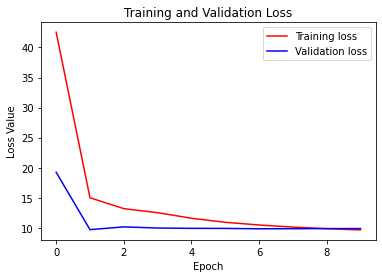

In [75]:
import matplotlib.pyplot as plt

epochs = 10
train_loss2 = history2.history['mae']
val_loss2 = history2.history['val_mae']

epochs = range(epochs)

plt.figure()
plt.plot(epochs, train_loss2, 'r', label='Training loss')
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

- We can see the **training and validation loss overlaps at epoch eight**. Training loss may continue to steadily decrease, but the model training needs to stop early for generalization trade-off. Also the loss scores are much lower than the First Model.

## **Third model**
Train data : 1275 images with input shape (128, 646, 1)

Test data : 158 images with input shape (128, 646, 1)


- Complex CNN model with more Conv layers, MaxPooling, LeakyRelu and additional nodes.
- **Shallow and wide** layers with more nodes on each layer

In [71]:

model3 = Sequential()

model3.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(128, 646, 1)))

# convolutional layer
model3.add(Conv2D(40, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2DTranspose(20, (4,4), strides=(2,2), padding='same'))
model3.add(LeakyReLU(alpha=0.2))

model3.add(Conv2D(20, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2DTranspose(40, (4,4), strides=(2,2), padding='same'))
model3.add(LeakyReLU(alpha=0.2))
model3.add(Dropout(0.25))

# output layer
model3.add(Dense(1, activation='linear'))

model3.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 128, 646, 25)      250       
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 128, 646, 40)      9040      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 64, 323, 40)       0         
_________________________________________________________________
conv2d_transpose_43 (Conv2DT (None, 128, 646, 20)      12820     
_________________________________________________________________
leaky_re_lu_48 (LeakyReLU)   (None, 128, 646, 20)      0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 128, 646, 20)      3620      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 64, 323, 20)     

In [74]:
# compiling the sequential model
model3.compile(loss='mse', metrics=['mae'], optimizer='adam')

# training the model
history3 = model3.fit(y_train_expanded, y_train_expanded, epochs=10, validation_data=(x_test_expanded, y_test_expanded))


Epoch 1/10
40/40 [==============================] - 196s 5s/step - loss: 122.8102 - mae: 8.2443 - val_loss: 172.3683 - val_mae: 9.2375
Epoch 2/10
40/40 [==============================] - 194s 5s/step - loss: 31.4855 - mae: 4.2435 - val_loss: 173.4465 - val_mae: 9.2154
Epoch 3/10
40/40 [==============================] - 195s 5s/step - loss: 28.4534 - mae: 4.0241 - val_loss: 174.1795 - val_mae: 9.2336
Epoch 4/10
40/40 [==============================] - 195s 5s/step - loss: 27.9276 - mae: 3.9786 - val_loss: 174.8868 - val_mae: 9.2529
Epoch 5/10
40/40 [==============================] - 195s 5s/step - loss: 27.1692 - mae: 3.9105 - val_loss: 175.3895 - val_mae: 9.2652
Epoch 6/10
40/40 [==============================] - 194s 5s/step - loss: 26.9910 - mae: 3.8866 - val_loss: 175.7831 - val_mae: 9.2772
Epoch 7/10
40/40 [==============================] - 195s 5s/step - loss: 25.9763 - mae: 3.8088 - val_loss: 176.4245 - val_mae: 9.2951
Epoch 8/10
40/40 [==============================] - 194s 5s/s

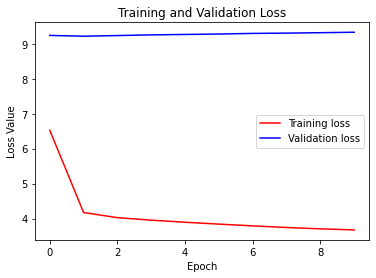

In [76]:
import matplotlib.pyplot as plt

epochs = 10
train_loss3 = history3.history['mae']
val_loss3 = history3.history['val_mae']

epochs = range(epochs)

plt.figure()
plt.plot(epochs, train_loss3, 'r', label='Training loss')
plt.plot(epochs, val_loss3, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')

plt.legend()
plt.show()

- Model three converges too fast that validation loss is lost from the first epoch

## **Combined Train and Validation graphs** from Previous Models

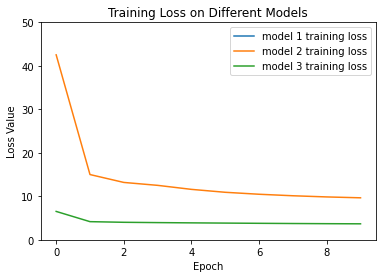

In [83]:
import matplotlib.pyplot as plt

epochs = 10

epochs = range(epochs)

plt.figure()
plt.plot(epochs, train_loss, label='model 1 training loss')
plt.plot(epochs, train_loss2,  label='model 2 training loss')
plt.plot(epochs, train_loss3,  label='model 3 training loss')

plt.title('Training Loss on Different Models')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 50])
# plt.xlim([0, 10])
plt.legend()
plt.show()

- Training Loss : **Fastest convergence on Model 3** - and possibility of reaching smaller loss value if run with more epochs.

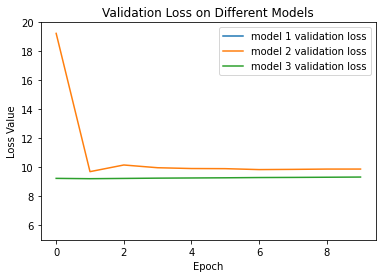

In [86]:
import matplotlib.pyplot as plt

epochs = 10
# train_loss4 = history4.history['mae']
# val_loss4 = history4.history['val_mae']

epochs = range(epochs)

plt.figure()
plt.plot(epochs, val_loss, label='model 1 validation loss')
plt.plot(epochs, val_loss2,  label='model 2 validation loss')
plt.plot(epochs, val_loss3,  label='model 3 validation loss')
# plt.plot(epochs, val_loss4,  label='model 4 validation loss')

plt.title('Validation Loss on Different Models')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([5, 20])
# plt.xlim([0, 10])
plt.legend()
plt.show()

- Validation Loss : **No significant change after epoch 1** -  Model 1 is not found in this graph since the error rate was out of bounds.